In [19]:
from matplotlib import pyplot as plt

class Vehicle:
    def __init__(self):
        """
        Creates new vehicle at (0,0) with a heading pointed East.
        """
        self.x       = 0 # meters
        self.y       = 0
        self.heading = "E" # Can be "N", "S", "E", or "W"
        self.history = []
        
    # TODO-1 - Implement this function 
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        
        # this line appends the current (x,y) coordinates
        # to the vehicle's history. Useful for plotting 
        # the vehicle's trajectory. You shouldn't need to
        # change this line.
        self.history.append((self.x, self.y))
        
        # vehicle currently pointing east...
        if   self.heading == "E":
            self.x += displacement
        
        # north
        elif self.heading == "N":
            self.y += displacement
        
        # west
        elif self.heading == "W":
            self.x -= displacement
        
        # south
        else:
            self.y -= displacement
        
    def turn(self, direction):
        if direction == "L":
            self.turn_left()
        elif direction == "R":
            self.turn_right()
        else:
            print("Error. Direction must be 'L' or 'R'")
            return
        
    def turn_left(self):
        """
        Updates heading (for a left turn) based on current heading
        """
        next_heading = {
            "N" : "W",
            "W" : "S",
            "S" : "E",
            "E" : "N",
        }
        self.heading = next_heading[self.heading]
        
    
    # TODO-2 - implement this function
    def turn_right(self):
        
        next_heading = {
            "E" : "S",
            "W" : "N",
            "N" : "E",
            "S" : "W",
        }
        self.heading = next_heading[self.heading]
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        X.append(self.x)
        Y.append(self.y)
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()

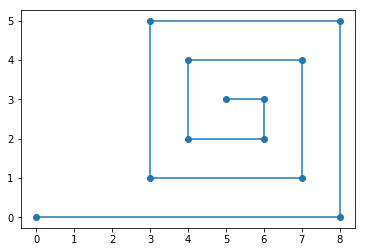

Nice job! Your vehicle is behaving as expected!


In [20]:
# TESTING CODE 1

# instantiate vehicle
v = Vehicle()

# drive in spirals of decreasing size
v.drive_forward(8)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(1)
v.turn("L")

v.drive_forward(1)

# show the trajectory. It should look like a spiral
v.show_trajectory()

# TESTING
assert(v.x == 5)
assert(v.y == 3)
first_5 = [
    (0, 0),
    (8, 0),
    (8, 5),
    (3, 5),
    (3, 1)
]
assert(first_5 == v.history[:5])
print("Nice job! Your vehicle is behaving as expected!")

In [1]:
# TESTING CODE Part 2
def test_zig_zag():
    v = Vehicle()
    for i in range(10):
        for _ in range(4):
            v.drive_forward(2)
            v.turn("R")
            v.drive_forward(1)
            v.turn("L")
        v.drive_forward(10)
        v.turn("R")
    first_six = [
        (0,0),
        (2,0),
        (2,-1),
        (4,-1),
        (4,-2),
        (6,-2)
    ]
    v.show_trajectory()
    assert(v.x == 14)
    assert(v.y == -22)
    assert(v.history[:6] == first_six)
    print("Nice job! Your vehicle passed the zig zag test.")
test_zig_zag()

NameError: name 'Vehicle' is not defined

Nice work! Your degrees to radians function works!
sin( 0 degrees) = 0.0
sin( 30 degrees) = 0.49999999999999994
sin( 45 degrees) = 0.7071067811865476
sin( 60 degrees) = 0.8660254037844386
sin( 90 degrees) = 1.0


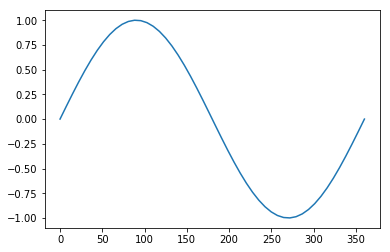

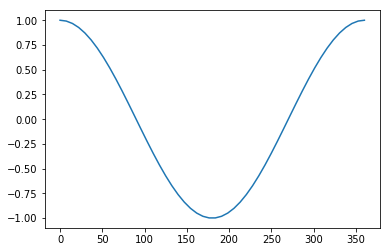

In [21]:
from math import pi
from math import sin, cos, tan, pi
def deg2rad(theta):
    """Converts degrees to radians"""
    # TODO - implement this function (solution
    #    code at end of notebook)
    return theta * (pi/180)

assert(deg2rad(45.0) == pi / 4)
assert(deg2rad(90.0) == pi / 2)
print("Nice work! Your degrees to radians function works!")

for theta in [0, 30, 45, 60, 90]:
    theta_rad = deg2rad(theta)
    sin_theta = sin(theta_rad)
    print("sin(", theta, "degrees) =", sin_theta)
    
    
import numpy as np
from matplotlib import pyplot as plt
def plot_sine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.sin(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X,Y)
    plt.show()
    
# EXERCISE 2.1 Implement this! Try not to look at the
#  implementation of plot_sine TOO much...
def plot_cosine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.cos(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X,Y)
    plt.show()
    pass

plot_sine(0, 360)
plot_cosine(0, 360)

In [30]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt

# these 2 lines just hide some warning messages.
import warnings
warnings.filterwarnings('ignore')

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        delta_x = displacement * np.cos(self.heading)
        delta_y = displacement * np.sin(self.heading)
        
        new_x = self.x + delta_x
        new_y = self.y + delta_y
        
        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y
    
    def set_heading(self, heading_in_degrees):
        """
        Set's the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between -pi and pi.
        """
        assert(-180 <= heading_in_degrees <= 180)
        rads = (heading_in_degrees * pi / 180) % (2*pi)
        self.heading = rads
        print("rads")
        
    def turn(self, degrees):
        rads = (degrees * pi / 180)
        new_head = self.heading + rads % (2*pi)
        self.heading = new_head
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        # get the x and y coordinates from vehicle's history
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        # don't forget to add the CURRENT x and y
        X.append(self.x)
        Y.append(self.y)
        
        # create scatter AND plot (to connect the dots)
        plt.scatter(X,Y)
        plt.plot(X,Y)
        
        plt.title("Vehicle (x, y) Trajectory")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.axes().set_aspect('equal', 'datalim')
        plt.show()

0.15707963267948966
0.3141592653589793
0.47123889803846897
0.6283185307179586
0.7853981633974483
0.9424777960769379
1.0995574287564276
1.2566370614359172
1.413716694115407
1.5707963267948966


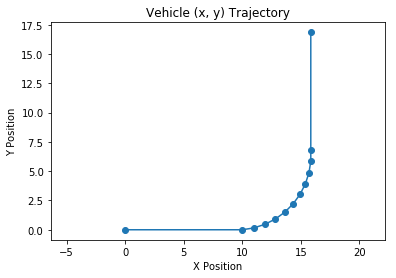

In [31]:
# You'll have to "test" your show_trajectory method 
# visually. Run the code below and see if the plot that's
# produced looks similar to the plot at the bottom of 
# this notebook.

# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()

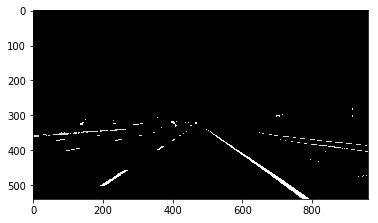

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.png", color_select)


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


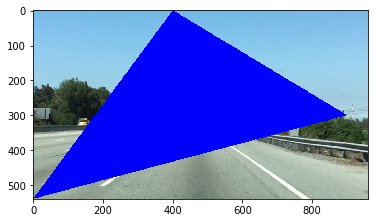

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [0, 0, 255]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

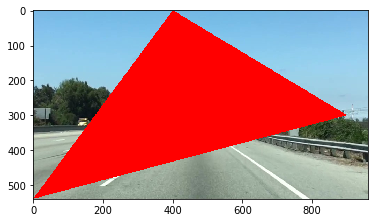

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
plt.show()

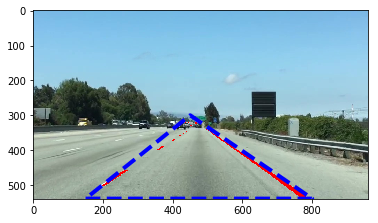

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [150, 539]
right_bottom = [800, 539]
apex = [450, 300]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)


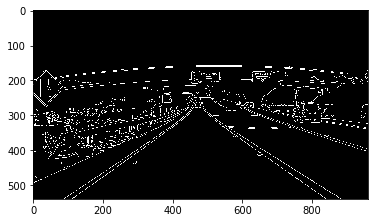

In [2]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

In [1]:
"""
Single straight line in image space corresponds to intersection in hough space
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

In [2]:
#PROJECT 2

SyntaxError: invalid syntax (<ipython-input-2-ef9507b7e85d>, line 1)

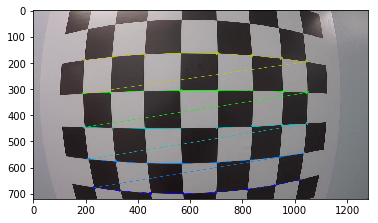

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8#TODO: enter the number of inside corners in x
ny = 5#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)



In [28]:
import numpy as np
np.mgrid[0:2, 0:3]

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

In [103]:
x = np.mgrid[0:2, 0:2]
x
x.shape
x[1][0][1]

1

In [95]:
for i in range(0, x.shape[0]):
    print( x[0][i])

[0 0]
[1 1]


In [108]:
x[0][0][1]

0

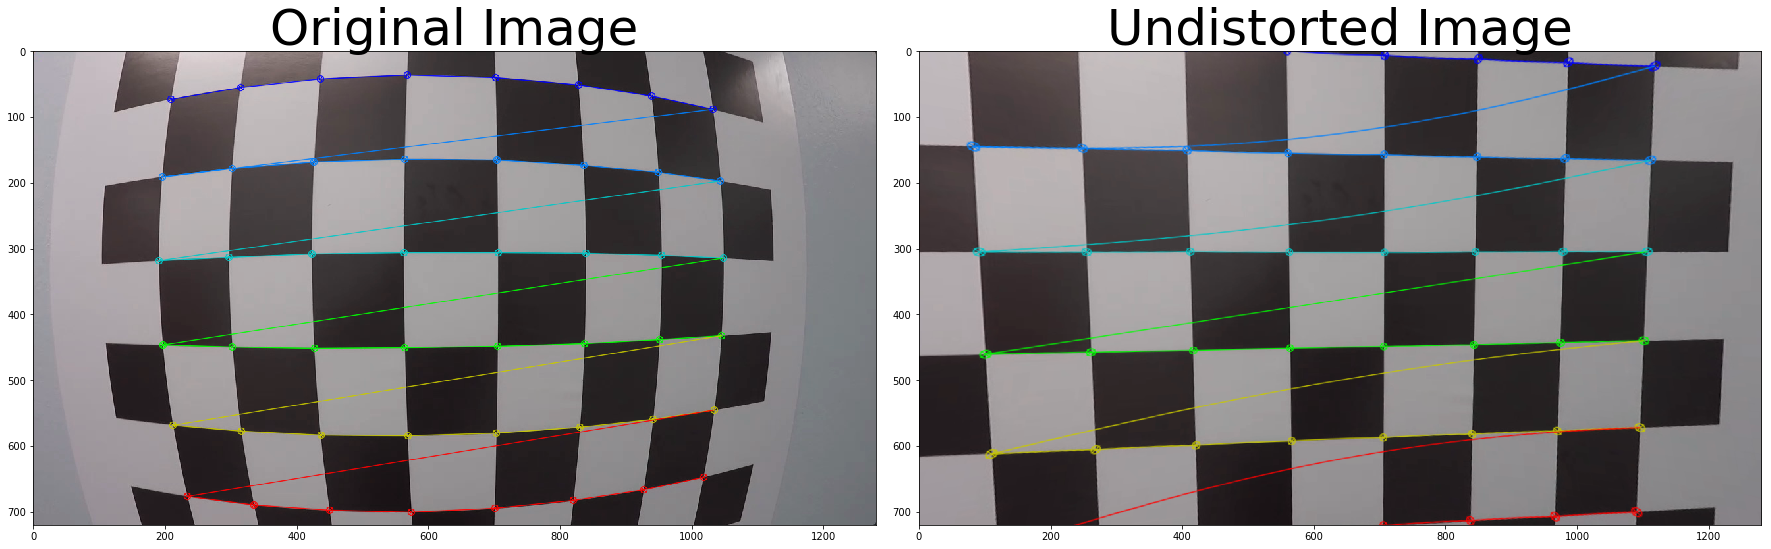

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

objectpoints = []
imagepoints = []
# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#create obj and img points
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# If found, draw corners
if ret == True:
    imagepoints.append(corners)
    objectpoints.append(objp)
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners,   ret)
    #plt.imshow(img)


#criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

#img.shape[1:]  gray.shape[::-1]  img.shape[1::-1]
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectpoints, imagepoints, gray.shape[::-1], None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)